In [1]:
#lettura dati

def leggi_dati(file_path):
    # Inizializza liste per ogni colonna
    angle, rate, err_rate = [], [], []
    count, err_count = [], []
    channel, err_channel = [], []
    sigma, err_sigma = [], []

    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Salta l'intestazione
        for line in lines[1:]:
            valori = line.strip().split()
            if len(valori) != 9:
                continue  # Salta righe non valide

            angle.append(float(valori[0]))
            rate.append(float(valori[1]))
            err_rate.append(float(valori[2]))
            count.append(float(valori[3]))
            err_count.append(float(valori[4]))
            channel.append(float(valori[5]))
            err_channel.append(float(valori[6]))
            sigma.append(float(valori[7]))
            err_sigma.append(float(valori[8]))

    return angle, rate, err_rate, count, err_count, channel, err_channel, sigma, err_sigma

file_path = "../../Codes/data_analysis/parameters_pol4_riflection.txt"

angle, rate, err_rate, count, err_count, channel, err_channel, sigma, err_sigma = leggi_dati(file_path)

file_path = "../../Codes/data_analysis/parameters_pol4_trasmission.txt"

angle_trasm, rate_trasm, err_rate_trasm, count_trasm, err_count_trasm, channel_trasm, err_channel_trasm, sigma_trasm, err_sigma_trasm = leggi_dati(file_path)

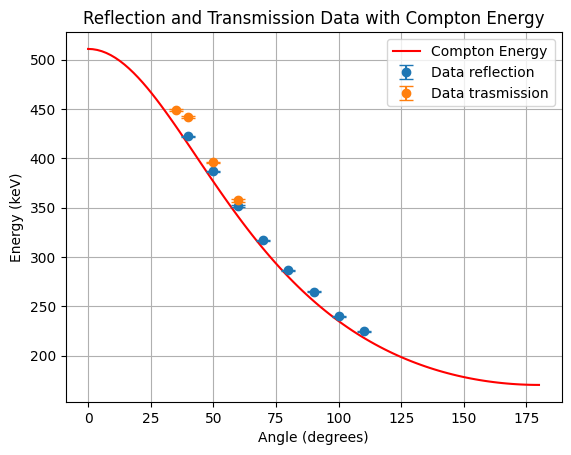

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def compton_energy(theta): 
    return 511 / (2 - np.cos(np.radians(theta)))

def calibration(x, a = 0.36, b = -11.5):
    """
    Calibration function for converting ADC channels to energy in keV.
    
    :param x: ADC channel value.
    :param a: Calibration coefficient (default: 0.36).
    :param b: Calibration offset (default: -11.5).
    :return: Energy in keV.
    """
    return a * x + b

thetas = np.linspace(0, 180, 100)

plt.plot(thetas, compton_energy(thetas), label='Compton Energy', color='red')
plt.errorbar(angle, calibration(np.array(channel)), yerr=err_channel, fmt='o', capsize=5, label='Data reflection')
plt.errorbar(angle_trasm, calibration(np.array(channel_trasm)), yerr=err_channel_trasm, fmt='o', capsize=5, label='Data trasmission')
plt.xlabel('Angle (degrees)')
plt.ylabel('Energy (keV)')
plt.title('Reflection and Transmission Data with Compton Energy')
plt.legend()
plt.grid()
plt.show()

# Bisogna mettere error bar e fare fit, ma le misure sono compatibili